In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import pandas as pd  
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm
dataframe = pd.read_csv("C:\\Users\\suman\\Desktop\\Assignment\\DS Assignment\\forestfires.csv")
dataframe

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataframe.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
print("Head:", dataframe.head())

Head:    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0     

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
dataframe.drop('monthaug',axis='columns', inplace=True)
dataframe.drop('monthdec',axis='columns', inplace=True)
dataframe.drop('monthfeb',axis='columns', inplace=True)
dataframe.drop('monthjan',axis='columns', inplace=True)
dataframe.drop('monthjul',axis='columns', inplace=True)
dataframe.drop('monthjun',axis='columns', inplace=True)
dataframe.drop('monthmar',axis='columns', inplace=True)
dataframe.drop('monthmay',axis='columns', inplace=True)
dataframe.drop('monthnov',axis='columns', inplace=True)
dataframe.drop('monthoct',axis='columns', inplace=True)
dataframe.drop('monthsep',axis='columns', inplace=True)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
dataframe.drop('daysat',axis='columns', inplace=True)
dataframe.drop('daysun',axis='columns', inplace=True)
dataframe.drop('daythu',axis='columns', inplace=True)
dataframe.drop('daytue',axis='columns', inplace=True)
dataframe.drop('daywed',axis='columns', inplace=True)
dataframe.drop('monthapr',axis='columns', inplace=True)

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  size_category  517 non-null    object 
dtypes: float64(8), int64(5), object(1)
memory usage: 56.7+ KB


In [9]:
print("Head:", dataframe.head())

Head:    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon size_category  
0       0         small  
1       0         small  
2       0         small  
3       0         small  
4       0         small  


In [10]:
df=pandas.get_dummies(dataframe,columns=['size_category'], drop_first=True)

In [11]:
print(df.head())

   month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon  size_category_small  
0       0                    1  
1       0                    1  
2       0                    1  
3       0                    1  
4       0                    1  


In [12]:
print("Shape:", dataframe.shape)

Shape: (517, 14)


<AxesSubplot:xlabel='month'>

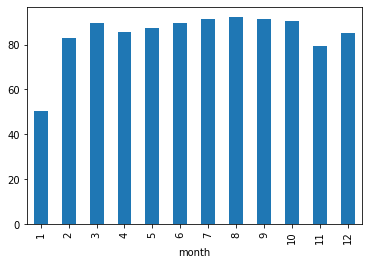

In [13]:
dataframe.groupby('month').FFMC.mean().plot(kind='bar')

<AxesSubplot:xlabel='day'>

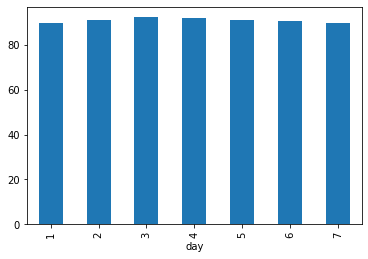

In [14]:
dataframe.groupby('day').FFMC.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

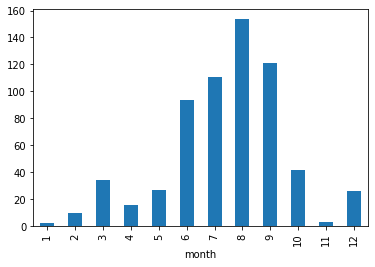

In [15]:
dataframe.groupby('month').DMC.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

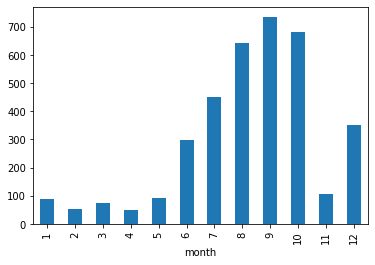

In [16]:
dataframe.groupby('month').DC.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

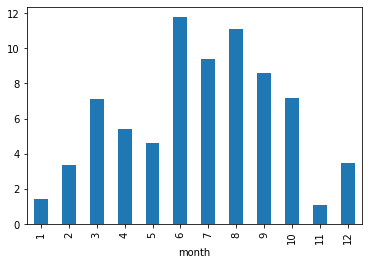

In [17]:
dataframe.groupby('month').ISI.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

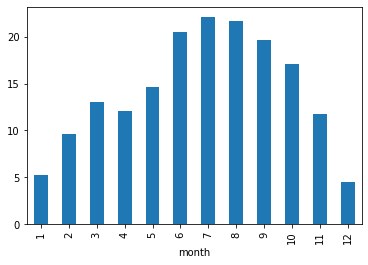

In [18]:
dataframe.groupby('month').temp.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

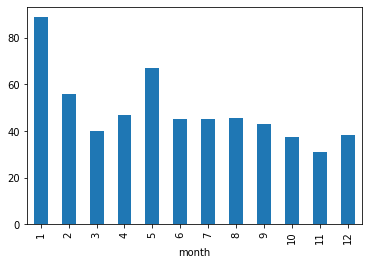

In [19]:
dataframe.groupby('month').RH.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

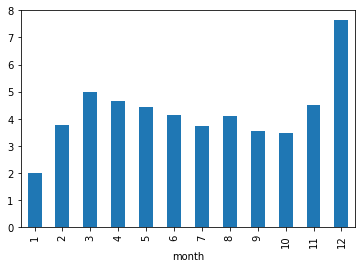

In [20]:
dataframe.groupby('month').wind.mean().plot(kind='bar')


<AxesSubplot:xlabel='month'>

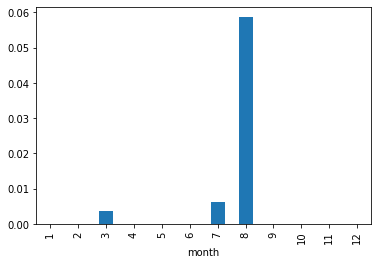

In [21]:
dataframe.groupby('month').rain.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

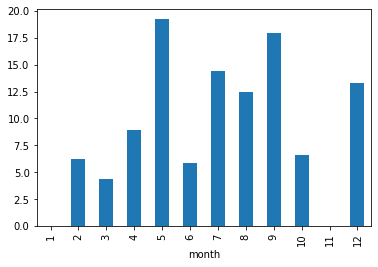

In [22]:
dataframe.groupby('month').area.mean().plot(kind='bar')

In [23]:
from sklearn.model_selection import train_test_split
X = dataframe[['FFMC', 'DMC']]
Y = dataframe['month']
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, Y_train)
score = classifier.score(x_test, y_test)
print(score)

0.6442307692307693


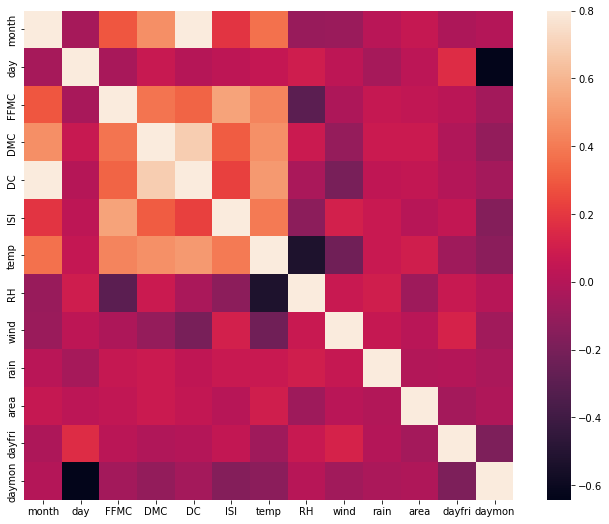

In [24]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = dataframe.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

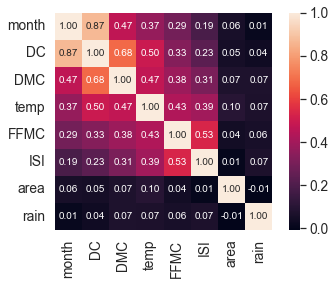

In [25]:
k = 8
cols = corrmat.nlargest(k, 'month')['month'].index
cm = np.corrcoef(dataframe[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

In [27]:
X = dataframe[['DC', 'ISI']]
Y = dataframe['month']
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
classifier = SVC()
classifier.fit(X_train, Y_train)
score = classifier.score(x_test, y_test)
print(score)

0.8173076923076923


In [28]:
X = dataframe[['FFMC', 'DMC', 'DC', 'temp']]
Y = dataframe['month']
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
classifier = SVC()
classifier.fit(X_train, Y_train)
score = classifier.score(x_test, y_test)
print(score)

0.7980769230769231


<AxesSubplot:xlabel='day'>

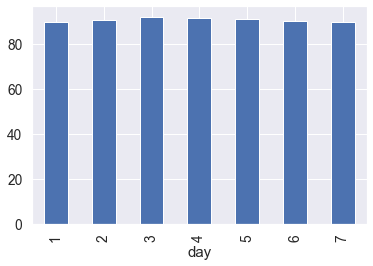

In [29]:
dataframe.groupby('day').FFMC.mean().plot(kind='bar')